In [ ]:

import numpy             as np
import matplotlib.pyplot as plt
import glob
import h5py as h
%matplotlib inline

In [ ]:
def Hist2d(title,Energys,Times,binss,xlimit,ylimit):
    fig,ax = plt.subplots(figsize=(8,8))
    plt.hist2d(Energys,Times,bins=binss,cmap=plt.cm.BuGn_r)
    plt.title(title)

    plt.ylabel("Energy keV",fontsize=26)
    plt.xlabel("Time us",fontsize=26)
    plt.tick_params('both', length=10, width=2, which='major')
    plt.tick_params('both', length=5, width=1, which='minor')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.grid(True)
    plt.tight_layout()

    plt.savefig('/home/ilker/Dropbox/nexus/build/source/'+title + '.png')
    plt.show()
    
def Hist1d(title,Energys,Bins,xlimit,ylimit,limits=False):
    fig, ax = plt.subplots(figsize=(8,8))
    plt.hist(Energys,bins=Bins,alpha=0.7,label=title)
    plt.ylabel("Counts",fontsize=26)
    plt.xlabel("Energy keV",fontsize=26)
    plt.tick_params('both', length=10, width=2, which='major')
    plt.tick_params('both', length=5, width=1, which='minor')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
    #plt.semilogy()
    if(limits):
        plt.xlim(xlimit)
        plt.ylim(ylimit)
    plt.grid(True)
    plt.tight_layout()

    #plt.savefig('/Users/austinmcdonald/Desktop/'+title + '.png')
    plt.show()
def Plot2d(title,x,y):
    fig,ax = plt.subplots(figsize=(8,8))
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.title(title)
    plt.ylabel("Z mm",fontsize=26)
    plt.xlabel("Y mm",fontsize=26)
    plt.tick_params('both', length=10, width=2, which='major')
    plt.tick_params('both', length=5, width=1, which='minor')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.grid(True)
    plt.tight_layout()
    plt.show()    

In [ ]:
def getEnergys(file):
    data = h.File(file,'r') 
    len1=data['MC']['configuration'][2][-1]
    Energys = []
    for x in range(0,int(len1)):
        Current_Event = x
        Current_Hit_Mask = data["MC"]['hits']['event_id'] == Current_Event

        Current_Particle_Mask = data["MC"]['particles']['event_id'] == Current_Event

        Electron_Mask = data["MC"]['particles'][Current_Particle_Mask]['particle_name'] == b'e-'

        Electron_PIDS = data["MC"]['particles'][Current_Particle_Mask][Electron_Mask]['particle_id']

        A = data["MC"]['hits'][Current_Hit_Mask]['particle_id'] 
        Hit_Electron_Maks = np.in1d(A, Electron_PIDS)
        
        MYE = data["MC"]['hits'][Current_Hit_Mask][Hit_Electron_Maks]['energy'].sum()*1e3
        if (MYE>450):
            print("Energy {} \t event {} ".format(MYE,Current_Event))
        Energys.append(data["MC"]['hits'][Current_Hit_Mask][Hit_Electron_Maks]['energy'].sum()*1e3)
    Energys = np.array(Energys)
    return Energys

def getTracks(file,Current_Event=0):
    data = h.File(file,'r')     

    Current_Hit_Mask = data["MC"]['hits']['event_id'] == Current_Event

    Current_Particle_Mask = data["MC"]['particles']['event_id'] == Current_Event

    Electron_Mask = data["MC"]['particles'][Current_Particle_Mask]['particle_name'] == b'e-'

    Electron_PIDS = data["MC"]['particles'][Current_Particle_Mask][Electron_Mask]['particle_id']

    A = data["MC"]['hits'][Current_Hit_Mask]['particle_id'] 
    Hit_Electron_Maks = np.in1d(A, Electron_PIDS)
    ElectronData=data["MC"]['hits'][Current_Hit_Mask][Hit_Electron_Maks]
    PIDWithCounts={}

    '''for i in ElectronData["particle_id"]:
        PID_mask=ElectronData["particle_id"]==i
        count = np.count_nonzero(PID_mask)
        PIDWithCounts[count]=PID_mask

    max_key=max(list(PIDWithCounts.keys()))
    ElectronsWithMaxTrack=ElectronData[PIDWithCounts[max_key]]
    '''
    Xhits=data["MC"]['hits'][Current_Hit_Mask][Hit_Electron_Maks]["x"]
    Yhits=data["MC"]['hits'][Current_Hit_Mask][Hit_Electron_Maks]["y"]
    Zhits=data["MC"]['hits'][Current_Hit_Mask][Hit_Electron_Maks]["z"]
    Tracks=np.array([Xhits,Yhits,Zhits])

    return Tracks

def Circle(pltX,PltY,title):
    pltX = A[2]
    pltY = A[1]
    fig,ax = plt.subplots(figsize=(8,8))
    plt.plot(pltX,pltY)
    plt.scatter(pltX,pltY)
    plt.title(title)
    circle1=plt.Circle((70,70),0.1,color='r',fill=False)
    ax.add_patch(circle1)

    circlex = np.arange(-70,70, 0.01)
    circley = np.sqrt(70**2 - circlex**2)
    plt.plot(circlex, circley, color='k', lw=2)
    plt.plot(circlex, -1*circley, color='k', lw=2)
    plt.xlim(-100,100)
    plt.ylim(-100,100)

    plt.ylabel("Z mm",fontsize=26)
    plt.xlabel("Y mm",fontsize=26)
    plt.tick_params('both', length=10, width=2, which='major')
    plt.tick_params('both', length=5, width=1, which='minor')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [76]:
file = "/home/ilker/Dropbox/nexus/build/source/Cs137_2mm12.h5"
E=getEnergys(file)

Energy 494.47178840637207 	 event 5 
Energy 470.54365277290344 	 event 7 
Energy 455.4346203804016 	 event 13 
Energy 457.8254222869873 	 event 17 
Energy 474.76717829704285 	 event 19 
Energy 468.2563543319702 	 event 21 
Energy 469.34133768081665 	 event 31 
Energy 473.2125401496887 	 event 34 
Energy 661.1332893371582 	 event 62 
Energy 601.7165184020996 	 event 63 
Energy 660.8701944351196 	 event 71 
Energy 556.3001036643982 	 event 72 
Energy 526.5843868255615 	 event 76 
Energy 578.7041187286377 	 event 95 
Energy 661.2703204154968 	 event 109 
Energy 511.6614103317261 	 event 117 
Energy 661.2419486045837 	 event 126 
Energy 661.1959338188171 	 event 134 
Energy 660.5490446090698 	 event 144 
Energy 661.2186431884766 	 event 177 
Energy 455.8819532394409 	 event 179 
Energy 566.4743185043335 	 event 207 
Energy 463.80025148391724 	 event 224 
Energy 454.0454149246216 	 event 226 
Energy 661.2757444381714 	 event 227 
Energy 627.9640197753906 	 event 232 
Energy 661.032378673553

Energy 661.2904071807861 	 event 1604 
Energy 580.6891918182373 	 event 1605 
Energy 661.4813804626465 	 event 1609 
Energy 478.4422218799591 	 event 1615 
Energy 453.29493284225464 	 event 1616 
Energy 562.3555779457092 	 event 1626 
Energy 469.9028730392456 	 event 1627 
Energy 631.8872570991516 	 event 1629 
Energy 661.4503860473633 	 event 1630 
Energy 595.6861972808838 	 event 1633 
Energy 470.8109200000763 	 event 1650 
Energy 476.6015410423279 	 event 1691 
Energy 631.6788792610168 	 event 1694 
Energy 660.3412628173828 	 event 1704 
Energy 661.078929901123 	 event 1713 
Energy 661.2223386764526 	 event 1716 
Energy 661.2922549247742 	 event 1721 
Energy 479.54410314559937 	 event 1732 
Energy 660.9074473381042 	 event 1736 
Energy 661.3616943359375 	 event 1745 
Energy 661.2703800201416 	 event 1749 
Energy 475.0809669494629 	 event 1757 
Energy 585.8680009841919 	 event 1769 
Energy 661.0441207885742 	 event 1781 
Energy 627.3196339607239 	 event 1785 
Energy 489.0384674072265

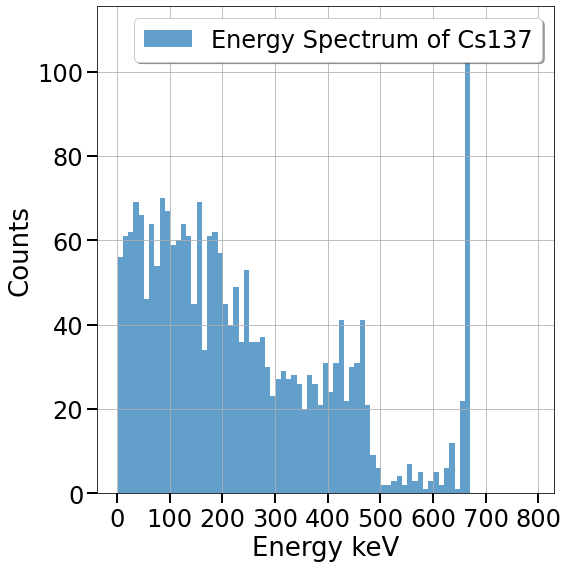

2284


In [74]:
Hist1d('Energy Spectrum of Cs137',E,np.arange(1,800,10),0,0)
print(len(E))

In [70]:
file="/home/ilker/Dropbox/nexus/build/source/Ba133_2mm222.h5"
BaE=getEnergys(file)

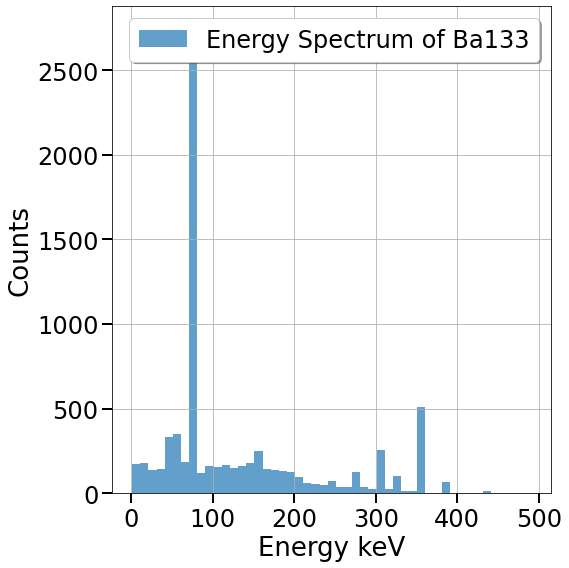

7738


In [72]:
Hist1d('Energy Spectrum of Ba133',BaE,np.arange(1,500,10),0,0)
print(len(BaE))

In [ ]:
file="/home/ilker/Dropbox/nexus/build/source/Cs137_2mm12.h5"
BaE2=getEnergys(file)

In [88]:
A=getTracks("/home/ilker/Dropbox/nexus/build/source/Cs137_2mm12.h5",295)

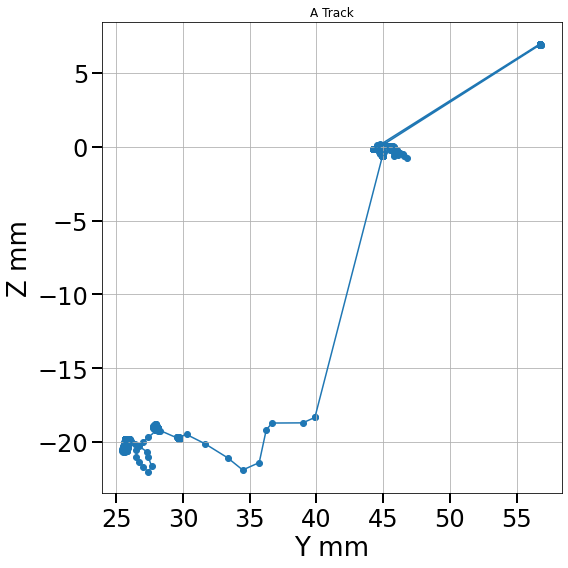

In [89]:
Plot2d("A Track",A[2],A[1])

In [22]:
file = "/home/ilker/Dropbox/nexus/build/source/gamma31_2mm_10k.h5"
Egama1=getEnergys(file)

In [ ]:
Circle()

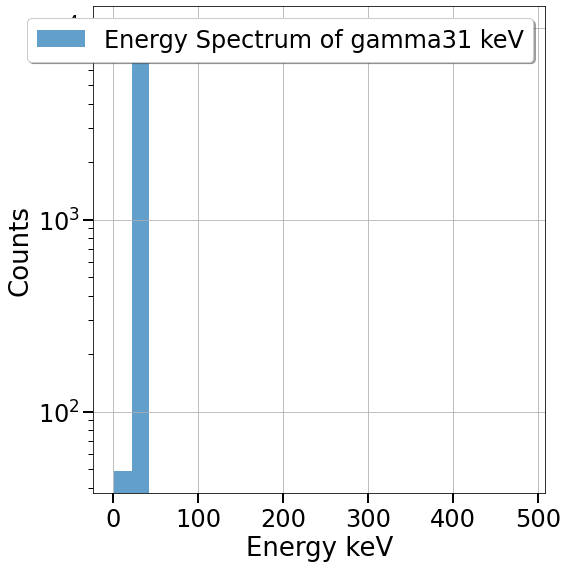

In [38]:
Hist1d('Energy Spectrum of gamma31 keV',Egama1,np.arange(1,500,21),0,0)

In [24]:
file = "/home/ilker/Dropbox/nexus/build/source/gamma61_2mm_10k.h5"
Egama2=getEnergys(file)

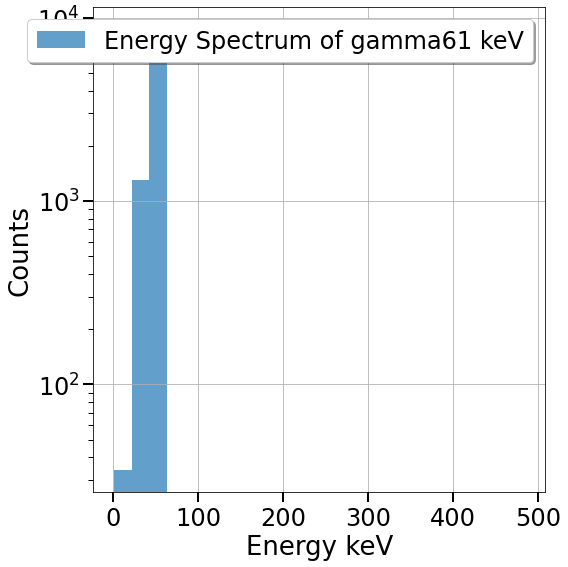

In [37]:
Hist1d('Energy Spectrum of gamma61 keV',Egama2,np.arange(1,500,21),0,0)

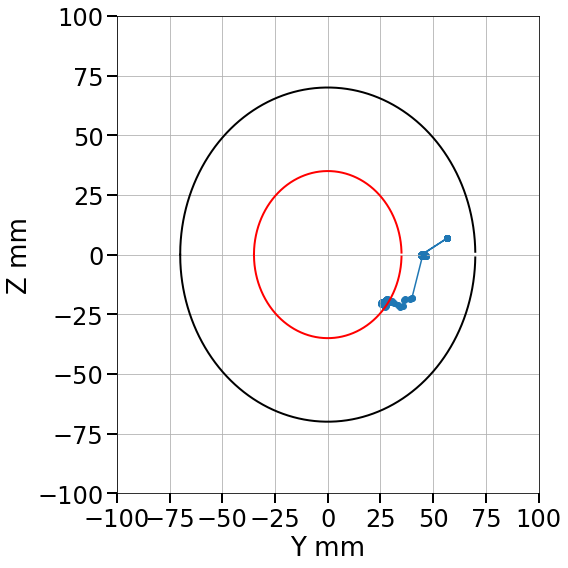